In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
train_df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
train_df['ethnicity'] = (
    train_df['ethnicity']          # original series
        .astype(str)               # guard against NaNs becoming floats
        .str.strip()               # trim spaces
        .str.lower()               # lower‑case everything
        .replace({'others': 'other'})   # collapse spelling variants (opt.)
        .str.title()               # back to "Title‑Case" for nice plots
)



In [ ]:
sns.set(style="whitegrid")

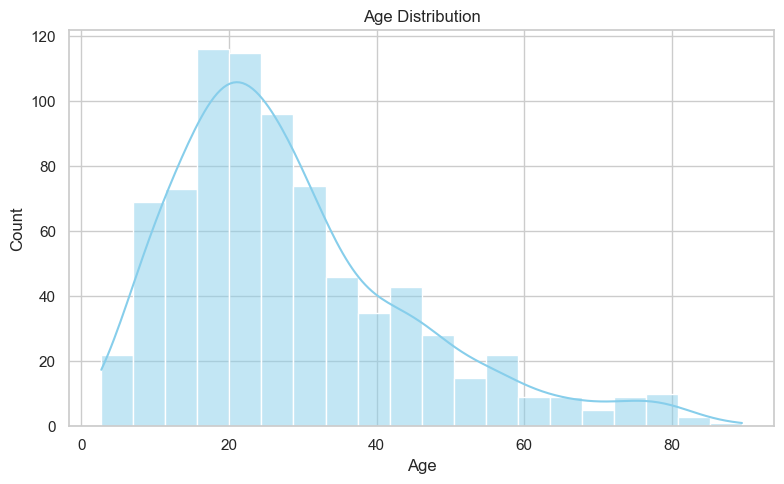

In [ ]:
# --------- Plot 1: Histogram of Age ---------
plt.figure(figsize=(8, 5))
sns.histplot(train_df['age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

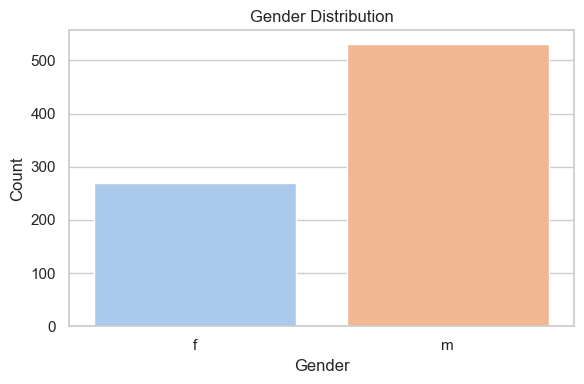

In [ ]:
# --------- Plot 2: Bar Chart of Gender ---------
plt.figure(figsize=(6, 4))
sns.countplot(
    x='gender', hue='gender', data=train_df,
    palette='pastel', legend=False          # legend off → same look as before
)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

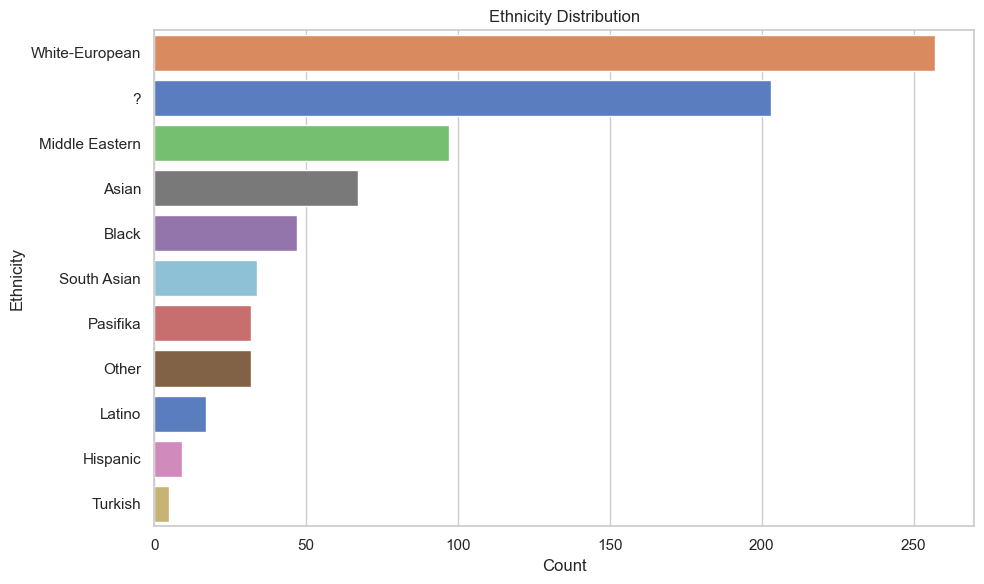

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='ethnicity', hue='ethnicity', data=train_df, 
              order=train_df['ethnicity'].value_counts().index,
              palette='muted')
plt.title("Ethnicity Distribution")
plt.xlabel("Count")
plt.ylabel("Ethnicity")
plt.tight_layout()
plt.show()

Class/ASD,0,1
ethnicity,,
White-European,136,121
?,196,7
Black,41,6
Middle Eastern,91,6
Pasifika,26,6
Asian,63,4
Latino,13,4
South Asian,31,3
Hispanic,7,2


C:\Users\jperezbenitez\AppData\Local\Temp\ipykernel_32044\2458464204.py:22: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\jperezbenitez\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


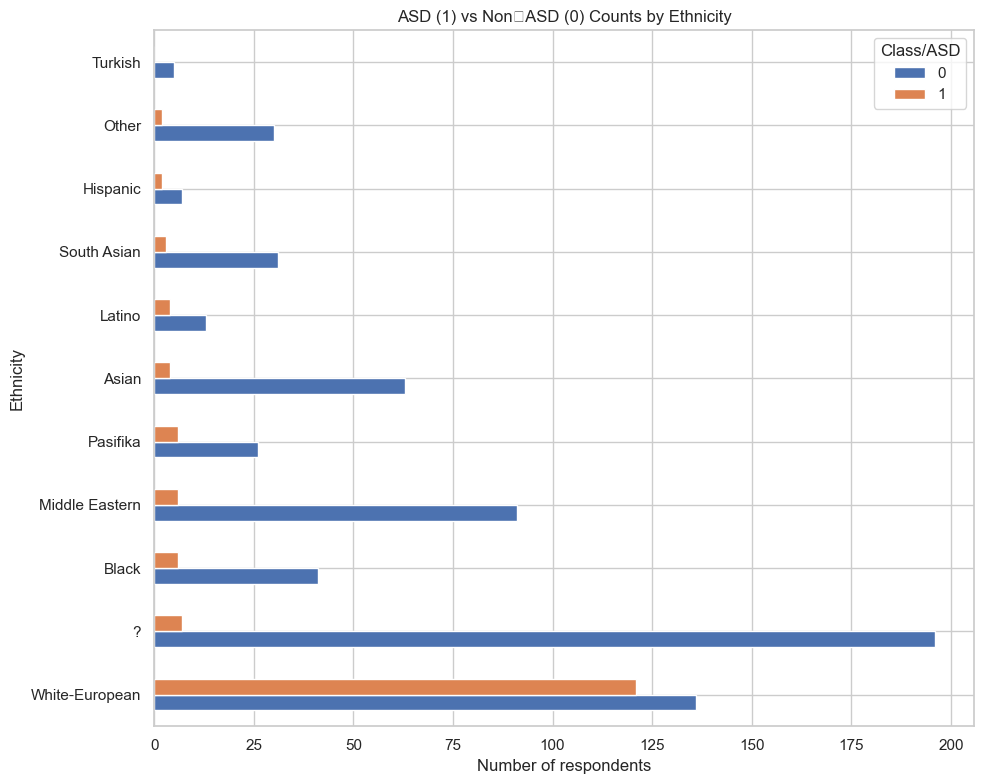

In [ ]:
# Group counts by ethnicity and ASD class
# --- Create the cross‑tab ---------------------------------------------------
counts = (
    train_df
    .groupby(['ethnicity', 'Class/ASD'])
    .size()
    .unstack(fill_value=0)              # columns: 0 = non‑ASD, 1 = ASD
    .sort_values(by=1, ascending=False) # optional: sort by ASD count
)

# quick look at the numbers
display(counts)                         # or just `print(counts)` in plain Python

# --- Plot: grouped horizontal bar chart ------------------------------------
plt.figure(figsize=(10, 8))
counts.plot(kind='barh', stacked=False, ax=plt.gca())

plt.title('ASD (1) vs Non‑ASD (0) Counts by Ethnicity')
plt.xlabel('Number of respondents')
plt.ylabel('Ethnicity')
plt.legend(title='Class/ASD')
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import chi2_contingency, mannwhitneyu
contingency_gender = pd.crosstab(train_df['gender'], train_df['Class/ASD'])
chi2_gender, p_gender, _,  = chi2_contingency(contingency_gender)
print(f"Chi-square test (gender vs Class/ASD): χ² = {chi2_gender:.2f}, p = {p_gender:.4f}")

NameError: name 'test_df' is not defined

In [ ]:
contingency_jaundice = pd.crosstab(train_df['jaundice'], train_df['Class/ASD'])
chi2_jaundice, p_jaundice, _, _ = chi2_contingency(contingency_jaundice)
print(f"Chi-square test (jaundice vs Class/ASD): χ² = {chi2_jaundice:.2f}, p = {p_jaundice:.4f}")

Chi-square test (jaundice vs Class/ASD): χ² = 14.60, p = 0.0001


In [ ]:
asd_group = train_df[train_df['Class/ASD'] == 1]['age']
non_asd_group = train_df[train_df['Class/ASD'] == 0]['age']
u_stat, p_u = mannwhitneyu(asd_group, non_asd_group, alternative='two-sided')
print(f"Mann-Whitney U test (age vs Class/ASD): U = {u_stat:.2f}, p = {p_u:.4f}")


Mann-Whitney U test (age vs Class/ASD): U = 59584.00, p = 0.0019
